# Credit Card Dataset for Clustering

THE PURPOSE OF THAT PROJECT IS **TO CLASSIFY CREDIT CARD CUSTOMER USING WITH K-MEANS ALGORITHM**

***Project Methods:***

1) to import **Pandas, NumPy, Seaborn, Matplotlib** into customer classification project

2) to preprocess the dataset of credit card which belongs to customer using with **StandardScaler /  corr()** Method

3) to **classify** using with **K-Means Algorithm**

4) to make **Dimensional Reduction** using with **PCA(Principal Component Analysis)**

Dataset:
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?select=CC+GENERAL.csv

***Expected Project Output***

1) to analyze the **dataset** and **Visualization** of this dataset

2) to look at **correlation of dataset** to understand the relation between data

3) to determine **number of clusters** using with **Elbow Method**

4) to classsify the customers using with **K-Means Algorithm**

5) As a Final Step, to make **Dimensional Reduction** using with **PCA** and visualize it



In [1]:
#import the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to not take any warnings, we can use "warnings" library

import warnings 
warnings.filterwarnings("ignore")

In [2]:
# let's read our dataset

dataset = pd.read_csv("CC GENERAL.csv")

# to display the data as a frame

dataset

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
# This code block is written to look at correlation of dataset to understand the relation between data using corr()

dataset.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


In literature, **strength of correlation is categorized by this way**:

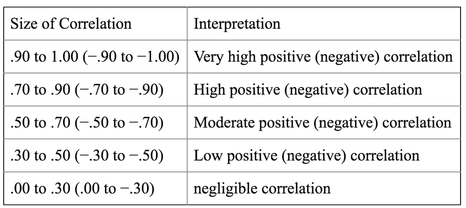

Reference link for image: https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8

To see dataset's correlation more clear, we can turn this correlation frame into **boolean data type** ***by taking values greater than 0.7***



In [4]:
# to detect for positive correlation

dataset.corr() > 0.7

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
BALANCE_FREQUENCY,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PURCHASES,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
ONEOFF_PURCHASES,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
INSTALLMENTS_PURCHASES,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
CASH_ADVANCE,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
PURCHASES_FREQUENCY,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
ONEOFF_PURCHASES_FREQUENCY,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
PURCHASES_INSTALLMENTS_FREQUENCY,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
CASH_ADVANCE_FREQUENCY,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False


We have detected these results:

1) **PURCHASES / ONEOFF_PURCHASES (Positive)**

2) **PURCHASES_FREQUENCY / PURCHASES_INSTALLMENTS_FREQUENCY  (Positive)**

3) **CASH_ADVANCE_FREQUENCY / CASH_ADVANCE_TRX  (Positive)**

In [5]:
# to detect for negative correlation

dataset.corr() <-0.7

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
BALANCE_FREQUENCY,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PURCHASES,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
ONEOFF_PURCHASES,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
INSTALLMENTS_PURCHASES,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
CASH_ADVANCE,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PURCHASES_FREQUENCY,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
ONEOFF_PURCHASES_FREQUENCY,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
PURCHASES_INSTALLMENTS_FREQUENCY,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
CASH_ADVANCE_FREQUENCY,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


We have detected that there is **no negative correlation** in this dataset.

***PURCHASES / ONEOFF_PURCHASES*** (Positive Correlation) Part **--->**

1) to find **the most suitable values of K-Means** using Elbow Method

2) to **visualize** results

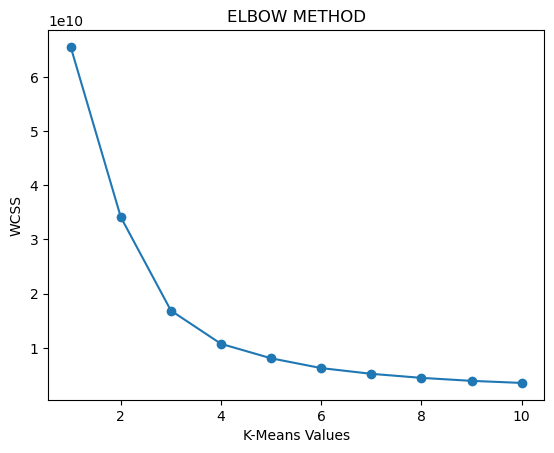

In [6]:
# Elbow Method for PURCHASES / ONEOFF_PURCHASES feature

X1 = dataset.iloc[:,[3,4]].values

# Let's code to show the most suitable value of K-Means

from sklearn.cluster import KMeans

wcss = list()

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init="k-means++", random_state = 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)


# to plot to see more clear

plt.scatter(range(1,11), wcss)
plt.plot(range(1,11), wcss)
plt.xlabel("K-Means Values")
plt.ylabel("WCSS")
plt.title("ELBOW METHOD")
plt.show()

According to this plot; we can see that the **point of decline** is **"4"**. 

That means **"4" is namely the most suitable cluster number for** ***PURCHASES / ONEOFF_PURCHASES***

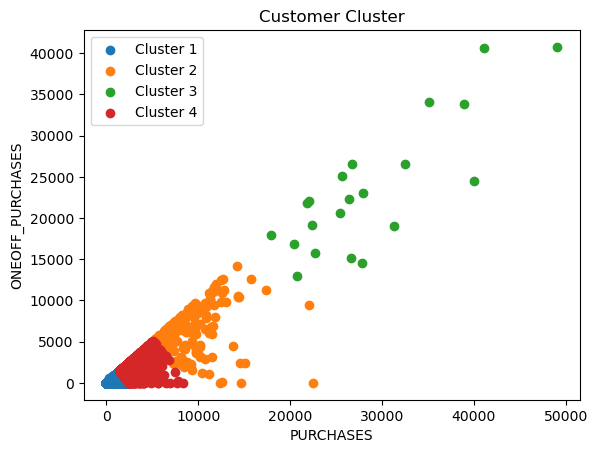

In [7]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X1)

# to visualize
X1 = dataset.iloc[:,[3,4]] # we have assigned again, because ".values" is not a valid code. 
plt.scatter(X1[y_kmeans == 0]["PURCHASES"], [X1[y_kmeans == 0]["ONEOFF_PURCHASES"]], label = 'Cluster 1')
plt.scatter(X1[y_kmeans == 1]["PURCHASES"], [X1[y_kmeans == 1]["ONEOFF_PURCHASES"]], label = 'Cluster 2')
plt.scatter(X1[y_kmeans == 2]["PURCHASES"], [X1[y_kmeans == 2]["ONEOFF_PURCHASES"]], label = 'Cluster 3')
plt.scatter(X1[y_kmeans == 3]["PURCHASES"], [X1[y_kmeans == 3]["ONEOFF_PURCHASES"]], label = 'Cluster 4')
plt.title('Customer Cluster')
plt.xlabel("PURCHASES")
plt.ylabel("ONEOFF_PURCHASES")
plt.legend()
plt.show()

***PURCHASES_FREQUENCY / PURCHASES_INSTALLMENTS_FREQUENCY*** (Positive Correlation) **-->**

1) to **find the most suitable value of K-Means** using Elbow Method

2) to **visualize** results

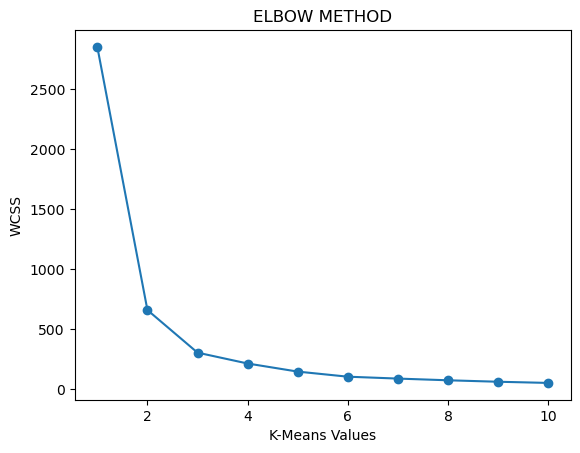

In [8]:
# Elbow Method for PURCHASES_INSTALLMENTS_FREQUENCY / PURCHASES_FREQUENCY feature(column)

X2 = dataset.iloc[:,[7,9]].values

# Let's code to show optimum value of K-Means

from sklearn.cluster import KMeans

wcss = list()

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init="k-means++", random_state = 42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)


# to plot to see more clear

plt.scatter(range(1,11), wcss)
plt.plot(range(1,11), wcss)
plt.xlabel("K-Means Values")
plt.ylabel("WCSS")
plt.title("ELBOW METHOD")
plt.show()

According to this plot; we can see that the **point of decline** is **"3"**.

That means **"3" is namely the optimum cluster number for PURCHASES_INSTALLMENTS_FREQUENCY / PURCHASES_FREQUENCY**

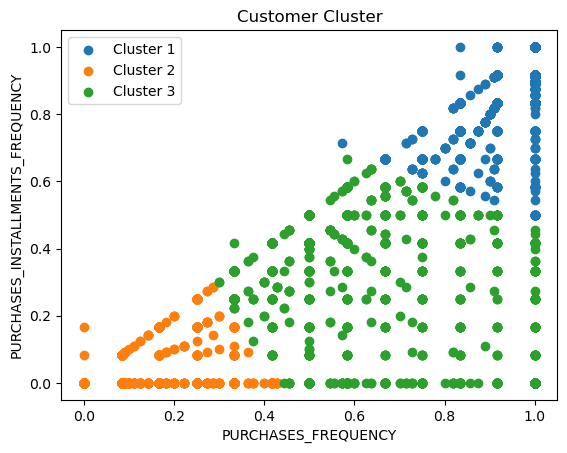

In [9]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X2)

# to visualize

X2 = dataset.iloc[:,[7,9]] # we have assigned again, because ".values" is not a valid code. 
plt.scatter(X2[y_kmeans == 0]["PURCHASES_FREQUENCY"], [X2[y_kmeans == 0]["PURCHASES_INSTALLMENTS_FREQUENCY"]], label = 'Cluster 1')
plt.scatter(X2[y_kmeans == 1]["PURCHASES_FREQUENCY"], [X2[y_kmeans == 1]["PURCHASES_INSTALLMENTS_FREQUENCY"]], label = 'Cluster 2')
plt.scatter(X2[y_kmeans == 2]["PURCHASES_FREQUENCY"], [X2[y_kmeans == 2]["PURCHASES_INSTALLMENTS_FREQUENCY"]], label = 'Cluster 3')
plt.title('Customer Cluster')
plt.xlabel("PURCHASES_FREQUENCY")
plt.ylabel("PURCHASES_INSTALLMENTS_FREQUENCY")
plt.legend()
plt.show()

***CASH_ADVANCE_FREQUENCY / CASH_ADVANCE_TRX*** (Positive Correlation) **-->**

1) to find the **optimum value of K-Means** using Elbow Method

2) to **visualize** results

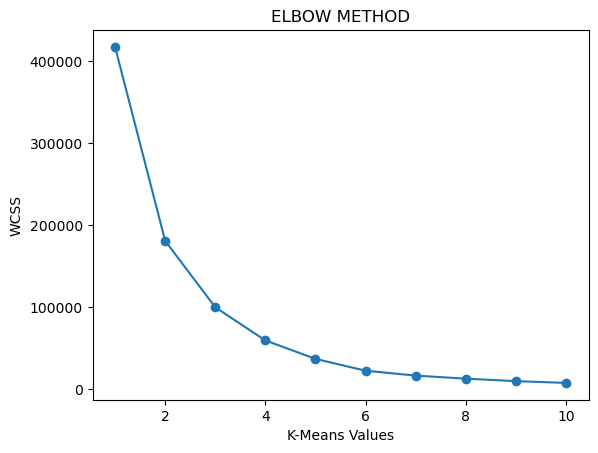

In [10]:
# Elbow Method for CASH_ADVANCE_FREQUENCY / CASH_ADVANCE_TRX feature

X3 = dataset.iloc[:,[10,11]].values

# Let's code to show optimum value of K-Means

from sklearn.cluster import KMeans

wcss = list()

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init="k-means++", random_state = 42)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)


# to plot to see more clear

plt.scatter(range(1,11), wcss)
plt.plot(range(1,11), wcss)
plt.xlabel("K-Means Values")
plt.ylabel("WCSS")
plt.title("ELBOW METHOD")
plt.show()

According to this plot; we can see that the **point of decline** is **"5"**.

That means **"5" is namely the optimum cluster number for CASH_ADVANCE_FREQUENCY / CASH_ADVANCE_TRX**

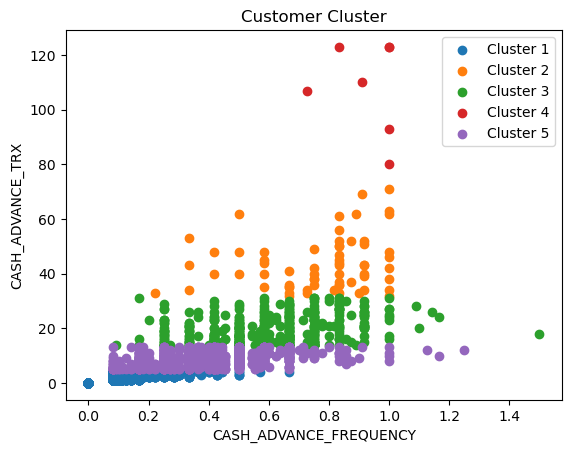

In [11]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X3)

# to visualize

X3 = dataset.iloc[:,[10,11]]

plt.scatter(X3[y_kmeans == 0]["CASH_ADVANCE_FREQUENCY"], [X3[y_kmeans == 0]["CASH_ADVANCE_TRX"]], label = 'Cluster 1')
plt.scatter(X3[y_kmeans == 1]["CASH_ADVANCE_FREQUENCY"], [X3[y_kmeans == 1]["CASH_ADVANCE_TRX"]], label = 'Cluster 2')
plt.scatter(X3[y_kmeans == 2]["CASH_ADVANCE_FREQUENCY"], [X3[y_kmeans == 2]["CASH_ADVANCE_TRX"]], label = 'Cluster 3')
plt.scatter(X3[y_kmeans == 3]["CASH_ADVANCE_FREQUENCY"], [X3[y_kmeans == 3]["CASH_ADVANCE_TRX"]], label = 'Cluster 4')
plt.scatter(X3[y_kmeans == 4]["CASH_ADVANCE_FREQUENCY"], [X3[y_kmeans == 4]["CASH_ADVANCE_TRX"]], label = 'Cluster 5')
plt.title('Customer Cluster')
plt.xlabel("CASH_ADVANCE_FREQUENCY")
plt.ylabel("CASH_ADVANCE_TRX")
plt.legend()
plt.show()

***Let's observe the 6 features we found together and do PCA.***

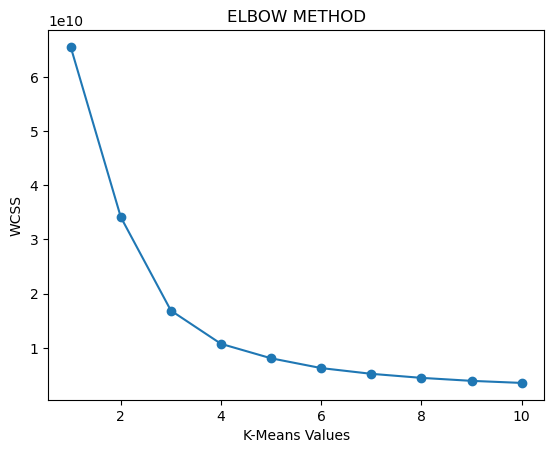

In [12]:
X4 = dataset.iloc[:,[3,4,7,9,10,11]].values

# Let's code to show optimum value of K-Means

from sklearn.cluster import KMeans

wcss = list()

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init="k-means++", random_state = 42)
    kmeans.fit(X4)
    wcss.append(kmeans.inertia_)


# to plot to see more clear

plt.scatter(range(1,11), wcss)
plt.plot(range(1,11), wcss)
plt.xlabel("K-Means Values")
plt.ylabel("WCSS")
plt.title("ELBOW METHOD")
plt.show()

According to this plot; we can see that the **point of decline is "4".**

That means **"4" is namely the optimum cluster number for:** 

1) PURCHASES / ONEOFF_PURCHASES (Positive)

2) PURCHASES_FREQUENCY / PURCHASES_INSTALLMENTS_FREQUENCY (Positive)

3) CASH_ADVANCE_FREQUENCY / CASH_ADVANCE_TRX (Positive)

**(all of these categories)**

                                                   |||WITH PCA|||

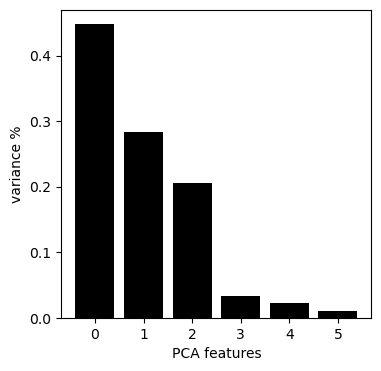

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataforpca = pd.read_csv("CC GENERAL.csv")

sc = StandardScaler()
X_forpca = sc.fit_transform(dataforpca.iloc[:,[3,4,7,9,10,11]])
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X_forpca)

# Plot the explained variances
plt.figure(figsize = (4,4))
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

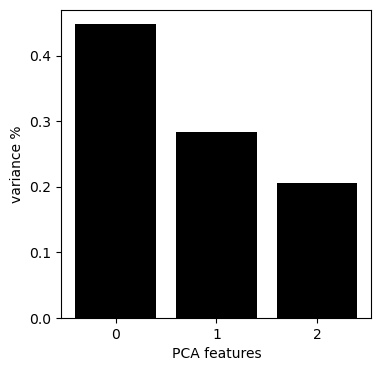

In [16]:
dataforpca = pd.read_csv("CC GENERAL.csv")

sc = StandardScaler()
X_forpca = sc.fit_transform(dataforpca.iloc[:,[3,4,7,9,10,11]])
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_forpca)

# Plot the explained variances
plt.figure(figsize = (4,4))
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

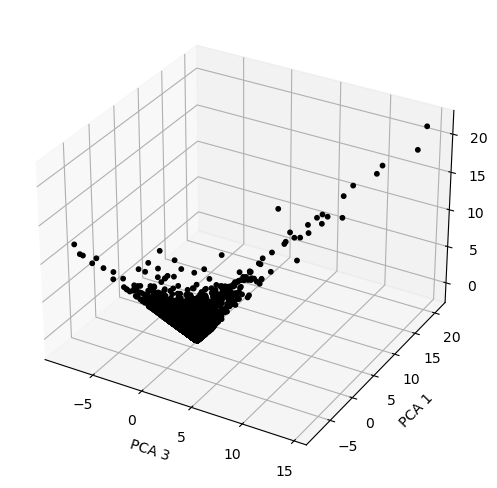

In [17]:
plt.figure(figsize= (6,8))
#plotting the results 3D
ax = plt.axes(projection="3d")
ax.scatter(PCA_components[2], PCA_components[0],PCA_components[1], alpha=1, s = 10,color='black')
plt.xlabel("PCA 3")
plt.ylabel("PCA 1")
plt.show()